This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


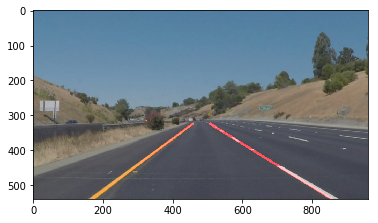

In [16]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
%matplotlib inline
def region_of_interest(img, vertices):
    # Define a blank matrix that matches the image height/width.
    #mask = np.zeros_like(img)
    # Retrieve the number of color channels of the image.
    #channel_count = img.shape[2]
    # Create a match color with the same color channel counts.
    #match_mask_color = (255,) * channel_count
    # Fill inside the polygon
    #cv2.fillPoly(mask, vertices, match_mask_color)
    # Returning the image only where mask pixels match
    #masked_image = cv2.bitwise_and(img, mask)
    
    
    mask = np.zeros_like(img)
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    
    
    return masked_image

def draw_lines(img, lines, color=[255, 0, 0], thickness=10):
    im = np.copy(img)
    # exit if no line is detected
    if lines is None:
        return
    # blank image to draw lines on
    line_img = np.zeros( (im.shape[0], im.shape[1], 3 ), dtype = np.uint8 )
    # Loop over blank image
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(line_img, (x1, y1), (x2, y2), color, thickness)
    # merge lines with original image.
    image_line = cv2.addWeighted(img, 0.8, line_img, 1.0, 0.0)
    return image_line

#reading in an image
image = mpimg.imread('test_images/solidYellowCurve2.jpg')
im = np.copy(image)
height = im.shape[0]
width = im.shape[1]
#define region of  interest
region_of_interest_vertices = [(0, height), (width/2, height/2), (width, height)]
#cropped_image = region_of_interest(image, np.array([region_of_interest_vertices], np.int32))

# Convert to grayscale here.
gray_image = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
# Call Canny Edge Detection here.
canny_image = cv2.Canny(gray_image, 70, 150)
# Crop the image.
cropped_image = region_of_interest(canny_image, np.array([region_of_interest_vertices], np.int32))

lines = cv2.HoughLinesP(cropped_image, rho=6, theta=np.pi / 180, threshold=160, lines=np.array([]), minLineLength=40, maxLineGap=25)
#line_image = draw_lines(image, lines)

#Find the left and right lanes
left_line_x = []
left_line_y = []
right_line_x = []
right_line_y = []
for line in lines:
    for x1, y1, x2, y2 in line:
        slope = (y2 - y1) / (x2 - x1) # <-- Calculating the slope.
        if math.fabs(slope) < 0.5: # <-- Only consider extreme slope
            continue
        if slope <= 0: # <-- If the slope is negative, left group.
            left_line_x.extend([x1, x2])
            left_line_y.extend([y1, y2])
        else: # <-- Otherwise, right group.
            right_line_x.extend([x1, x2])
            right_line_y.extend([y1, y2])

min_y = int(image.shape[0] * (3 / 5)) # <-- Just below the horizon
max_y = int(image.shape[0]) # <-- The bottom of the image

poly_left = np.poly1d(np.polyfit(left_line_y, left_line_x, deg=1))
left_x_start = int(poly_left(max_y))
left_x_end = int(poly_left(min_y))

poly_right = np.poly1d(np.polyfit(right_line_y, right_line_x, deg=1))
right_x_start = int(poly_right(max_y))
right_x_end = int(poly_right(min_y))

line_image = draw_lines(image, [[[left_x_start, max_y, left_x_end, min_y], [right_x_start, max_y, right_x_end, min_y]]], thickness=5)
#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(line_image)

